<a href="https://colab.research.google.com/github/disha-ramchandani/Gold-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import files

file = files.upload()

Saving gold_data.csv to gold_data.csv


In [ ]:
df_gold=pd.read_csv('gold_data.csv', index_col='Date', parse_dates=True) 
df_gold.dropna()
print("Shape of dataset", df_gold.shape)

Shape of dataset (1718, 6)


In [ ]:
df_gold.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100


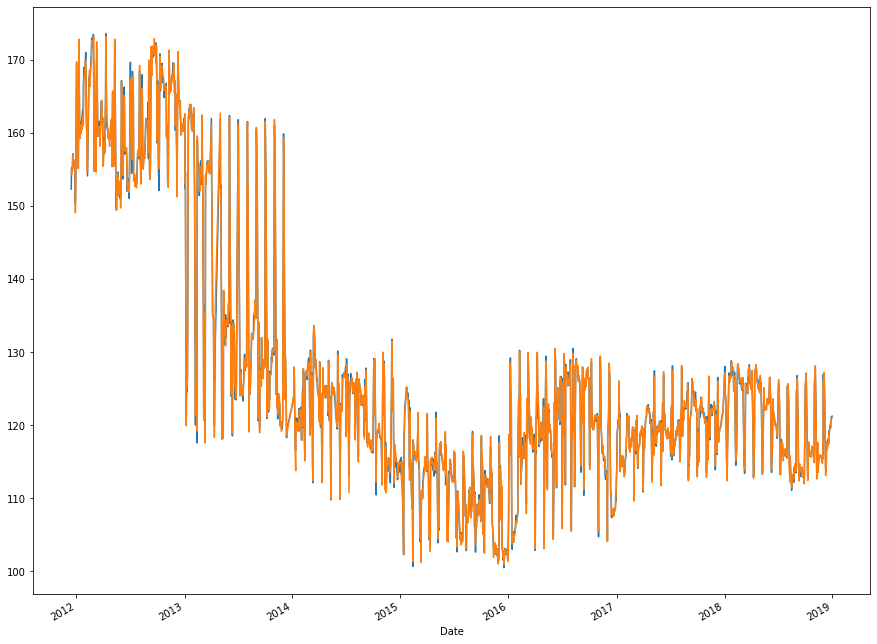

In [ ]:
from IPython.core.pylabtools import figsize
df_gold['Close'].plot(figsize=(15,12))
df_gold['Open'].plot(figsize=(15,12))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag="AIC")
  print("ADF: ", dftest[0])
  print("Pvalues: ", dftest[1])
  print("Number of lags: ", dftest[2])
  print("No of observations: ", dftest[3])
  print("Critical values:")
  for key, val in dftest[4].items():
    print("\t",key, ": ", val)


In [ ]:
print("For Opening Values ")
ad_test(df_gold['Open'])
print('\n')
print("For Closing Values ")
ad_test(df_gold['Close'])


For Opening Values 
ADF:  -1.8463008423644867
Pvalues:  0.3577287558336919
Number of lags:  0
No of observations:  1717
Critical values:
	 1% :  -3.4341642709947586
	 5% :  -2.8632247871349015
	 10% :  -2.567666934183466


For Closing Values 
ADF:  -1.8234601291067787
Pvalues:  0.3688781538232951
Number of lags:  1
No of observations:  1716
Critical values:
	 1% :  -3.434166497101742
	 5% :  -2.8632257697922383
	 10% :  -2.5676674574279645


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df_gold['Open'], trace=True, suppress_warnings=True)
                         
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5568.169, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5564.870, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5565.261, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5565.144, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5563.314, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5566.202, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.894 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1718
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2780.657
Date:                Tue, 16 Aug 2022   AIC                           5563.314
Time:                        17:19:12   BIC                           5568.763
Sample:                             0   HQIC                          5565.330
                               - 1718                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.4934      0.021     72.002      0.000       1.453       1.534
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):              7364.91
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(df_gold['Close'], trace=True, suppress_warnings=True)
                         
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5656.173, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5656.200, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5651.960, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5651.565, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5654.558, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5652.699, Time=1.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5652.291, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5649.496, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5656.042, Time=0.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5654.048, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5649.639, Time=1.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5653.439, Time=2.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5647.921, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5650.731, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1718
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2819.961
Date:                Tue, 16 Aug 2022   AIC                           5647.921
Time:                        17:20:42   BIC                           5669.715
Sample:                             0   HQIC                          5655.985
                               - 1718                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8880      0.076    -11.671      0.000      -1.037      -0.739
ma.L1          0.8289      0.074     11.163      0.000       0.683       0.974
ma.L2         -0.0815      0.011     -7.501      0.000      -0.103      -0.060
sigma2         1.5634      0.023     67.041      0.000       1.518       1.609
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9652.28
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df_gold.shape)
train = df_gold.iloc[:-343]
test = df_gold.iloc[-343:]
print(train.shape, "dataset for training ARIMA Model")
print(test.shape, "dataset for testing ARIMA Model")

(1718, 6)
(1375, 6) dataset for training ARIMA Model
(343, 6) dataset for testing ARIMA Model


Training for Close Values

In [ ]:
model = ARIMA(train['Close'], order=(1,1,2))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1375
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2360.285
Date:                Tue, 16 Aug 2022   AIC                           4728.570
Time:                        17:20:54   BIC                           4749.472
Sample:                             0   HQIC                          4736.391
                               - 1375                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8724      0.104     -8.403      0.000      -1.076      -0.669
ma.L1          0.8159      0.102      8.034      0.000       0.617       1.015
ma.L2         -0.0797      0.013     -6.229      0.0

Testing for Close Values

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
predict_set = model.predict(start=start, end=end, typ='levels')
predict_set.index=df_gold.index[start:end+1]
print(predict_set)

Date
2017-08-14    122.793662
2017-08-16    122.733373
2017-08-17    122.785970
2017-08-18    122.740084
2017-08-21    122.780115
                 ...    
2018-12-24    122.761463
2018-12-26    122.761463
2018-12-27    122.761463
2018-12-28    122.761463
2018-12-31    122.761463
Name: predicted_mean, Length: 343, dtype: float64


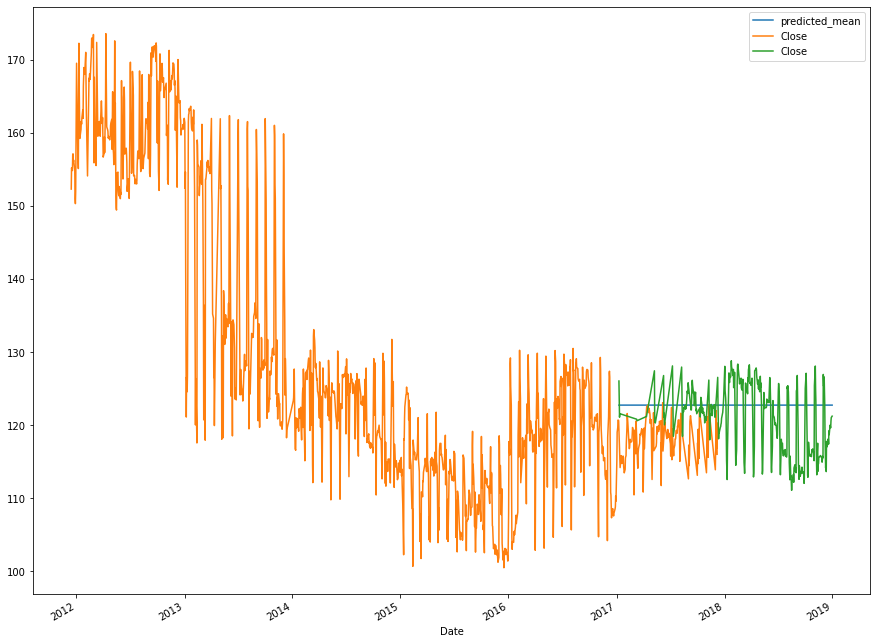

In [ ]:
predict_set.plot(legend=True,figsize=(15,12))
train['Close'].plot(legend=True)
test['Close'].plot(legend=True)

In [ ]:
test['Close'].mean()

120.778425787172

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Close'].mean()
rmse=sqrt(mean_squared_error(predict_set,test['Close']))
print(rmse)

5.042581141175384


In [ ]:
avg = test['Close'].mean
mape = np.mean(np.abs(np.array(predict_set[:-1])-np.array(test))/np.abs(test))
print('MAPE: '+str(mape))
   

   

In [ ]:
 mape = np.mean(np.abs(train['Close'] - test['Close'])/train['Close']))*100
 mape=sqrt(mean_squared_error(predict_set,test['Close'])*100)

 from sklearn.metrics import mean_absolute_error
from math import sqrt
test['Close'].mean()
mape = mean_absolute_error(train, test)*100
print(mape)